# **[Flayson Santos](https://www.linkedin.com/in/flayson-santos/)** Especialista em machine learning **[Github](https://github.com/FlaysonSantos/Machine_Learning/tree/main/Multi-class%20Classification)**

# Projeto: Multi-class Classification
Bem-vindo ao projeto Multi-class Classification ! Neste projeto, iremos trabalhar em um problema de classificação multiclasse. usaremos o conjunto de dados MNIST da [linguagem de sinais](https://www.kaggle.com/datamunge/sign-language-mnist) , que contém imagens de mãos de 28 x 28 representando como 26 letras do alfabeto inglês.

Iremos pré-processar os dados para que eles possam ser alimentados em sua rede neural convolucional para classificar corretamente cada imagem como a letra que ela representa.

Vamos começar!


In [17]:
# Bibliotecas

import csv
import string
import numpy as np
from os import getcwd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

Baixe os conjuntos de treinamento e teste (o conjunto de teste será realmente usado como um conjunto de validação):

In [2]:
# sign_mnist_train.csv
!gdown --id 1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
# sign_mnist_test.csv
!gdown --id 1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
To: /content/sign_mnist_train.csv
100% 83.3M/83.3M [00:01<00:00, 55.2MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg
To: /content/sign_mnist_test.csv
100% 21.8M/21.8M [00:00<00:00, 37.2MB/s]


Definindo alguns globais com o caminho para ambos os arquivos que foram baixados:

In [18]:
# grader-required-cell

TRAINING_FILE = './sign_mnist_train.csv'
VALIDATION_FILE = './sign_mnist_test.csv'

Ao contrário das atribuições acima, não teremos as imagens reais fornecidas, em vez disso, teremos os dados serializados como arquivos `csv`.

Dê uma sensação em como os dados parecem dentro do arquivo `csv`:

In [19]:
# Verificando os dados

with open(TRAINING_FILE) as training_file:
  line = training_file.readline()
  print(f"First line (header) looks like this:\n{line}")
  line = training_file.readline()
  print(f"Each subsequent line (data points) look like this:\n{line}")

First line (header) looks like this:
label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pix

Como podemos ver, cada arquivo inclui um cabeçalho (a primeira linha) e cada ponto de dados subsequente é representado como uma linha que contém 785 valores.

O primeiro valor é o rótulo (a representação numérica de cada letra) e os outros 784 valores são o valor de cada pixel da imagem. Vale lembrar que as imagens originais têm resolução de 28x28, que somam 784 pixels.

 ## Parsing the dataset

 Now complete the `parse_data_from_input` below.

 This function should be able to read a file passed as input and return 2 numpy arrays, one containing the labels and one containing the 28x28 representation of each image within the file. These numpy arrays should have type `float64`.

 A couple of things to keep in mind:

- The first line contains the column headers, so you should ignore it.

- Each successive line contains 785 comma-separated values between 0 and 255
  - The first value is the label

  - The rest are the pixel values for that picture

  
Analisando o conjunto de dados
Agora vamos concluir o parse_data_from_inputabaixo.

Esta função deve ser capaz de ler um arquivo passado como entrada e retornar 2 arrays numpy, um contendo os rótulos e outro contendo uma representação 28x28 de cada imagem dentro do arquivo. Essas matrizes numpy devem ter o tipo float64.

Algumas coisas a ter em mente:

A primeira linha contém os cabeçalhos das colunas, então você deve ignorá-la.

Cada linha sucessiva contém 785 valores separados por vírgula entre 0 e 255, o primeiro valor é o rótulo
o resto são os valores de pixel para essa imagem

Dica:

Para remodelar os arrays (passando de 784 para 28x28), iremos usar funções como np.array_splitou np.reshape.

Para converter o tipo das matrizes numpy, use o método np.ndarray.astype. E usar np.loadtxt. Você pode encontrar a documentação [aqui](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)..

Independentemente do método escolhido, nossa função deve terminar sua execução em menos de 1 minuto.


In [28]:
# grader-required-cell

# GRADED FUNCTION: parse_data_from_input
def parse_data_from_input(filename):
  """
  Parses the images and labels from a CSV file

  Args:
    filename (string): path to the CSV file

  Returns:
    images, labels: tuple of numpy arrays containing the images and labels
  """
  with open(filename) as file:
    ### START CODE HERE
    data = np.loadtxt(filename, delimiter=',', skiprows=1)
    labels = data[:,0].astype(int).reshape(-1)
    images = data[:,1:].astype(float).reshape(-1, 28, 28)
    # Use csv.reader, passing in the appropriate delimiter
    # Remember that csv.reader can be iterated and returns one line in each iteration



    ### END CODE HERE

    return images, labels

path_sign_mnist_train = f"{getcwd()}/content/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/content/sign_mnist_test.csv"
training_images, training_labels = parse_data_from_input(TRAINING_FILE)
validation_images, validation_labels = parse_data_from_input(VALIDATION_FILE)

In [29]:
# grader-required-cell

# Test your function
#training_images, training_labels = parse_data_from_input(TRAINING_FILE)
#validation_images, validation_labels = parse_data_from_input(VALIDATION_FILE)

print(f"Training images has shape: {training_images.shape} and dtype: {training_images.dtype}")
print(f"Training labels has shape: {training_labels.shape} and dtype: {training_labels.dtype}")
print(f"Validation images has shape: {validation_images.shape} and dtype: {validation_images.dtype}")
print(f"Validation labels has shape: {validation_labels.shape} and dtype: {validation_labels.dtype}")

Training images has shape: (27455, 28, 28) and dtype: float64
Training labels has shape: (27455,) and dtype: int64
Validation images has shape: (7172, 28, 28) and dtype: float64
Validation labels has shape: (7172,) and dtype: int64


**Expected Output:**
```
Training images has shape: (27455, 28, 28) and dtype: float64
Training labels has shape: (27455,) and dtype: float64
Validation images has shape: (7172, 28, 28) and dtype: float64
Validation labels has shape: (7172,) and dtype: float64
```

##Visualizando os arrays numpy

Agora que você converteu os dados csv iniciais em um formato compatível com tarefas de visão computacional, reserve um momento para ver como as imagens do conjunto de dados se parecem:

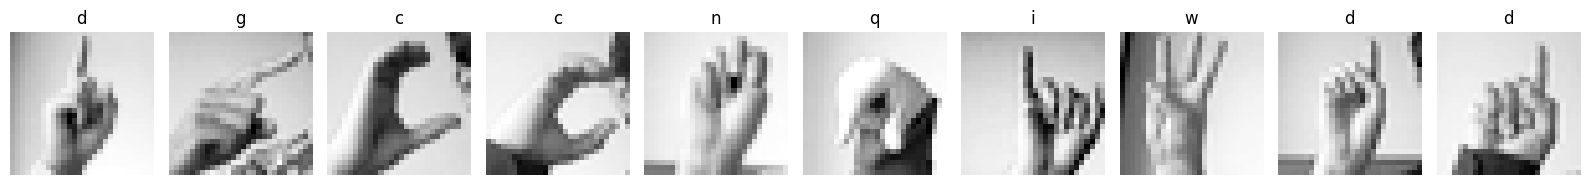

In [30]:
# Plot a sample of 10 images from the training set
def plot_categories(training_images, training_labels):
  fig, axes = plt.subplots(1, 10, figsize=(16, 15))
  axes = axes.flatten()
  letters = list(string.ascii_lowercase)

  for k in range(10):
    img = training_images[k]
    img = np.expand_dims(img, axis=-1)
    img = array_to_img(img)
    ax = axes[k]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(f"{letters[int(training_labels[k])]}")
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()

plot_categories(training_images, training_labels)

##Criando os geradores para a CNN

Agora que organizamos com sucesso os dados de uma maneira que podemos facilmente alimentada no **Keras' ImageDataGenerator**, é hora de codificar os geradores que produzirão lotes de imagens, tanto para treinamento quanto para validação. Para isso, vamos preencher a train_val_generators função abaixo.

Algumas notas importantes:

As imagens neste conjunto de dados vêm na mesma resolução, então não iremos definir um padrão target_sizeneste caso.

Na verdade, nem pode fazer isso porque desta vez não estaremos  usando o flow_from_directorymétodo (como nas tarefas anteriores). Em vez disso, nós vamos usar o método [`flow`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow).

Precisaremos adicionar a dimensão "cor" aos arrays numpy que codificam as imagens. Como são imagens em preto e branco, essa nova dimensão deve ter tamanho 1 (em vez de 3, que é usado quando se trata de imagens coloridas). Dê uma olhada na função [`np.expand_dims`](https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html) isso.


In [37]:
# grader-required-cell

# GRADED FUNCTION: train_val_generators
def train_val_generators(training_images, training_labels, validation_images, validation_labels):
  """
  Creates the training and validation data generators

  Args:
    training_images (array): parsed images from the train CSV file
    training_labels (array): parsed labels from the train CSV file
    validation_images (array): parsed images from the test CSV file
    validation_labels (array): parsed labels from the test CSV file

  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # In this section you will have to add another dimension to the data
  # So, for example, if your array is (10000, 28, 28)
  # You will need to make it (10000, 28, 28, 1)
  # Hint: np.expand_dims
  training_images = np.expand_dims(training_images, axis=3)
  validation_images = np.expand_dims(validation_images, axis=3)

  # Instantiate the ImageDataGenerator class
  # Don't forget to normalize pixel values
  # and set arguments to augment the images (if desired)
  train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    fill_mode='nearest'
)



  # Pass in the appropriate arguments to the flow method
  train_generator = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=20
)


  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  # Remember that validation data should not be augmented
  validation_datagen = ImageDataGenerator(
    rescale=1./255
)

  # Pass in the appropriate arguments to the flow method
  validation_generator = validation_datagen.flow(
    validation_images,
    validation_labels,
    batch_size=20
)
  ### END CODE HERE

  return train_generator, validation_generator

In [38]:
# grader-required-cell

# Test your generators
train_generator, validation_generator = train_val_generators(training_images, training_labels, validation_images, validation_labels)

print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")

Images of training generator have shape: (27455, 28, 28, 1)
Labels of training generator have shape: (27455,)
Images of validation generator have shape: (7172, 28, 28, 1)
Labels of validation generator have shape: (7172,)


**Expected Output:**
```
Images of training generator have shape: (27455, 28, 28, 1)
Labels of training generator have shape: (27455,)
Images of validation generator have shape: (7172, 28, 28, 1)
Labels of validation generator have shape: (7172,)
```

##Codificando a CNN
Uma última etapa antes do treinamento é definir a arquitetura do modelo que será treinado.

iremos desenvolver a  *create_modelfunção* abaixo. Esta função deve retornar um modelo de Keras que usa o *Sequential* ou a *Functional_API*.

A última camada do nosso modelo deve ter um número de unidades que corresponda ao número de categorias possíveis, bem como a função de ativação correta.

Além de definir a arquitetura do modelo, iremos também compilá-lo, portanto, usaremos função *loss*  adequada para classificação multiclasse.

**Observe que não devemos usar mais do que 2 camadas Conv2D e 2 MaxPooling2D para obter o desempenho desejado.**



In [39]:
# grader-required-cell

def create_model():

  ### START CODE HERE

  # Define the model
  # Use no more than 2 Conv2D and 2 MaxPooling2D
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
  ])


  model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

  ### END CODE HERE

  return model

In [40]:
# Save your model
model = create_model()

# Train your model
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator)

Epoch 1/15
1373/1373 [==============================] - 31s 15ms/step - loss: 2.6306 - acc: 0.1907 - val_loss: 1.9737 - val_acc: 0.3158
Epoch 2/15
1373/1373 [==============================] - 19s 14ms/step - loss: 1.7836 - acc: 0.4228 - val_loss: 1.2473 - val_acc: 0.5519
Epoch 3/15
1373/1373 [==============================] - 21s 15ms/step - loss: 1.3591 - acc: 0.5547 - val_loss: 0.7780 - val_acc: 0.7243
Epoch 4/15
1373/1373 [==============================] - 19s 14ms/step - loss: 1.1084 - acc: 0.6347 - val_loss: 0.5428 - val_acc: 0.8153
Epoch 5/15
1373/1373 [==============================] - 20s 15ms/step - loss: 0.9378 - acc: 0.6883 - val_loss: 0.5505 - val_acc: 0.8130
Epoch 6/15
1373/1373 [==============================] - 20s 15ms/step - loss: 0.8038 - acc: 0.7338 - val_loss: 0.3904 - val_acc: 0.8589
Epoch 7/15
1373/1373 [==============================] - 20s 14ms/step - loss: 0.7258 - acc: 0.7585 - val_loss: 0.3480 - val_acc: 0.8726
Epoch 8/15
1373/1373 [==========================

Agora vamos olhar no histórico de treinamento:

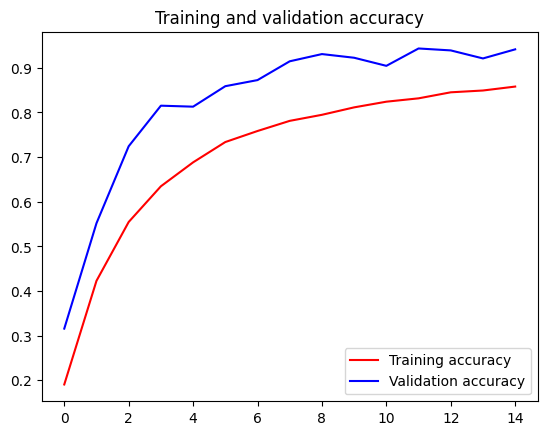

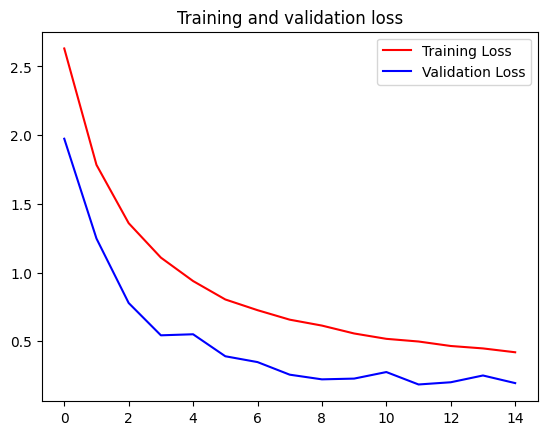

In [43]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [46]:
# Download metadata checker
!wget -nc https://storage.googleapis.com/tensorflow-1-public/colab_metadata_checker.py

File ‘colab_metadata_checker.py’ already there; not retrieving.



In [47]:
import colab_metadata_checker

# Please see the output of this cell to see which file you need to submit to the grader
colab_metadata_checker.run('C2W4_Assignment_fixed.ipynb')

Grader metadata detected! You can download this notebook by clicking `File > Download > Download as .ipynb` and submit it to the grader!


# Obrigado por acompanhar o projeto!

**[Flayson Santos](https://www.linkedin.com/in/flayson-santos/)** Machine learning specialist

**[Github](https://github.com/FlaysonSantos/Machine_Learning/tree/main/Multi-class%20Classification)**